# Two-Way Anova Analysis 

For this two-way ANOVA we will be using a dependent variable of consumer sentiment value using University of Michigan Consumer Sentiment Index (monthly) averaged with University of Florida's Sentiment Index survey. The independent catergorical variables are created from features engineered from inflation (annual low, medium, and high) and gas prices (annual low, medium. high). 

In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
import pandas as pd
import pylab

### Loading the dataset exported from our previous review

In [2]:
tw = pd.read_csv('two_way_anova.csv')
tw.head()

,Date,sentiment,Resi_Gas,Elect_Price,Bacon Original Data Value,Bacon 1-Month Percent Change,Bacon 3-Month Percent Change,Bacon 12-Month Percent Change,Bananas Original Data Value,Bananas 1-Month Percent Change,...,Fuel_Oil_#2 12-Month Percent Change,Gasoline_all_types Original Data Value,Gasoline_all_types 1-Month Percent Change,Gasoline_all_types 3-Month Percent Change,Gasoline_all_types 12-Month Percent Change,Gasoline_unleaded Original Data Value,Gasoline_unleaded 1-Month Percent Change,Gasoline_unleaded 3-Month Percent Change,Gasoline_unleaded 12-Month Percent Change,Inflation
0,2001-01-01,94.00,10.12,7.73,2.994,-1.1,-2.4,8.9,0.500,2.7,...,26.9,1.525,-1.2,-5.5,12.5,1.472,-1.1,-5.6,13.1,0.63
1,2001-02-01,91.30,10.26,8.04,3.065,2.4,0.4,6.8,0.496,-0.8,...,-9.4,1.538,0.9,-4.4,8.2,1.484,0.8,-4.6,8.4,0.40
2,2001-03-01,92.80,9.85,8.32,3.159,3.1,4.3,7.9,0.510,2.8,...,2.6,1.503,-2.3,-2.7,-5.7,1.447,-2.5,-2.8,-6.1,0.23
3,2001-04-01,89.65,10.16,8.46,3.114,-1.4,4.0,5.5,0.492,-3.5,...,6.3,1.617,7.6,6.0,3.6,1.564,8.1,6.3,3.9,0.40
4,2001-05-01,91.80,11.14,8.83,3.256,4.6,6.2,8.3,0.509,3.5,...,6.3,1.812,12.1,17.8,16.8,1.729,10.5,16.5,15.4,0.45


We will subset the columns in question:
- Sentiment
- Inflation
- Gasoline Unleaded 

In [3]:
tw = pd.DataFrame(data=tw, columns=["sentiment", "Inflation","Gasoline_unleaded Original Data Value"])

In [4]:
tw.head()

,sentiment,Inflation,Gasoline_unleaded Original Data Value
0,94.00,0.63,1.472
1,91.30,0.40,1.484
2,92.80,0.23,1.447
3,89.65,0.40,1.564
4,91.80,0.45,1.729


Rename Gasoline for ease of use and reading

In [5]:
tw.rename(columns = {'Gasoline_unleaded Original Data Value':'Gas_Price'}, inplace = True)
tw.head()

,sentiment,Inflation,Gas_Price
0,94.00,0.63,1.472
1,91.30,0.40,1.484
2,92.80,0.23,1.447
3,89.65,0.40,1.564
4,91.80,0.45,1.729


Confirm the change and review central tendency metrics.

In [6]:
tw.describe()

,sentiment,Inflation,Gas_Price
count,248.000000,248.000000,248.000000
mean,84.487702,0.183548,2.560032
std,10.887387,0.380525,0.709499
min,57.600000,-1.920000,1.130000
25%,76.087500,-0.040000,2.073250
50%,86.775000,0.190000,2.562500
75%,93.575000,0.442500,3.023250
max,101.650000,1.220000,4.090000


From the describe function we can see that the standard deviation of sentiment is 10. We will do a quick check of normailty as this is a prerequisite of parametric tests. 

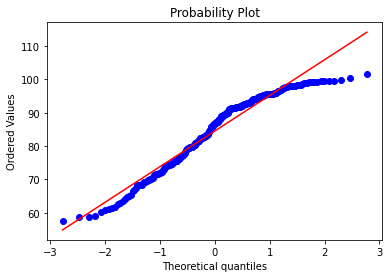

In [7]:
stats.probplot(tw['sentiment'], dist="norm", plot=pylab)
pylab.show()

### Normalize the dependent variable (sentiment)

In [8]:
shapiro(tw['sentiment'])


ShapiroResult(statistic=0.9452000260353088, pvalue=5.065351160737919e-08)

We can see from the P-value of the Shapiro test that sentiment is not normal. 

Normalize the data using a log transformation.

In [9]:
# tw['sentiment'] = np.log(tw['sentiment'])

In [10]:
tw.describe()

,sentiment,Inflation,Gas_Price
count,248.000000,248.000000,248.000000
mean,84.487702,0.183548,2.560032
std,10.887387,0.380525,0.709499
min,57.600000,-1.920000,1.130000
25%,76.087500,-0.040000,2.073250
50%,86.775000,0.190000,2.562500
75%,93.575000,0.442500,3.023250
max,101.650000,1.220000,4.090000


<AxesSubplot:>

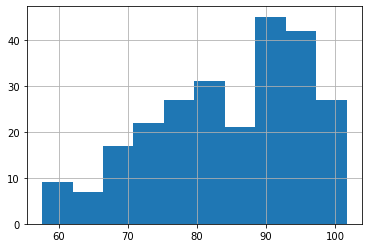

In [11]:
tw['sentiment'].hist()

### Levene's Test: Homogeneity of Variances

In [12]:
stats.levene(tw['sentiment'],tw['Inflation'],tw['Gas_Price'], center='trimmed') 

LeveneResult(statistic=661.0854241193047, pvalue=3.574659357964873e-159)

In [13]:
# category = pd.cut(tw.Inflation,bins=[0,2.073249,2.560031,4.09],labels=['Low','Medium','High'])
# tw.insert(3,'inflation',category)

def cg(x, high, low):
    if x > high:
        return('high')
    if x > low:
        return('medium')
    return ('low')

In [14]:
tw['Inflation'] = tw['Inflation'].apply(cg, args = [0.442500, -0.04])
tw['Gas_Price'] = tw['Gas_Price'].apply(cg, args = [3.023, 2.073250])

In [15]:
tw['Inflation'].value_counts(normalize=True)

medium    0.491935
low       0.258065
high      0.250000
Name: Inflation, dtype: float64

In [16]:
tw['Gas_Price'].value_counts(normalize=True)

medium    0.50
low       0.25
high      0.25
Name: Gas_Price, dtype: float64

In [17]:
tw.head()

,sentiment,Inflation,Gas_Price
0,94.00,high,low
1,91.30,medium,low
2,92.80,medium,low
3,89.65,medium,low
4,91.80,high,low


## Two-Way ANOVA Model Creation

##  Two-way ANOVA with interaction

### Testing the following three null hypotheses:

- There is no interaction between the Inflation and Gas variables. <br>
- The mean response is the same across Inflation. <br>
- The mean response is the same across Gas. 

In [18]:
ANOVA = ols('sentiment ~ C(Inflation) + C(Gas_Price) + C(Inflation):(Gas_Price)', data=tw).fit()
# lm = ols(ANOVA, tw).fit()
# print(anova_lm(lm))

In [19]:
sm.stats.anova_lm(ANOVA, typ=2)

,sum_sq,df,F,PR(>F)
C(Inflation),224.750131,2.0,1.285472,2.784249e-01
C(Gas_Price),8129.797768,2.0,46.498864,8.768057e-18
C(Inflation):Gas_Price,8160.228266,6.0,15.557638,4.661297e-15
Residual,20893.216593,239.0,NaN,NaN


#### Results:

- There is no interaction between the Inflation and Gas variables. <br>
  - __We reject the null hypothesis, there is interaction between Inflation and Gas Price__
- The mean response is the same across Inflation. <br>
  - __We reject, the mean response to sentiment is not the same across inflation.__
- The mean response is the same across Gas. 
  - __We reject, the mean response to sentiment is not the same across Gas__ 

### Tukey Test

In [20]:
mc = MultiComparison(tw['sentiment'],tw['Inflation'])
mcresult = mc.tukeyhsd(0.05) # the significance level is .05
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-0.3766,0.9,-4.9527,4.1995,False
high,medium,1.6939,0.5738,-2.3114,5.6991,False
low,medium,2.0705,0.4374,-1.893,6.034,False


In [21]:
mc = MultiComparison(tw['sentiment'],tw['Gas_Price'])
mcresult = mc.tukeyhsd(0.05) # the significance level is .05
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,13.8532,0.001,9.9217,17.7848,True
high,medium,12.9085,0.001,9.5037,16.3133,True
low,medium,-0.9448,0.77,-4.3496,2.4601,False


### Interaction Plot

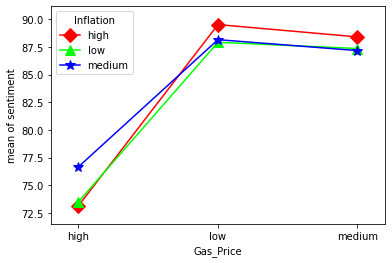

In [22]:

interaction_plot( tw.Gas_Price, tw.Inflation, tw.sentiment,markers=['D','^','*'], ms=10)

plt.show()

## Conclusion:



The assumptions of a two-way anova are not accepteded in this test. Performing both a normality test with Shapiro of the dependent variable and variance test with Levene leads to believe that two out of the three assumptions required are not met. However, moving through the test it is confirmed that gas prices and inflation do interact with each other as sentiment increases. __In short, a nonparametric test is needed for further investigation.__ Based on just this interaction plot where the assumptions of a Two-way anova are not accounted for we see the following results:

sentiment is mean between 75 and 77.5: interaction between high gas price and low/high inflation.<br>
sentiment is mean between 87.5 and 86: interaction between low gas price and low/medium inflation. 
